## Projeto: Aprendizagem Automática
### Introdução à Inteligência Artificial 2021/22

<img src="heartdisease.jpg" width="300">


Nome: Alexandre Rodrigues

Número: 54472


## Introdução

As doenças cardiovasculares são a causa número um de morte em todo o mundo, cerca de 17,9 milhões de pessoas morrem a cada ano, o que representa 31% de todas as mortes em todo o mundo. Quatro em cada cinco mortes por doença cardiovascular são devidos a ataques cardíacos e derrames, e um terço dessas mortes ocorrem prematuramente em pessoas com menos de 70 anos de idade. A insuficiência cardíaca é um evento comum causado por doenças cardiovasculares e este conjunto de dados contém 11 características que podem ser usados para prever uma possível doença cardíaca. 

Pessoas com doenças cardiovasculares ou que apresentam risco cardiovascular elevado, devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida, precisam de deteção precoce. O desenvolvimento de algoritmos de aprendizagem automática que ajudem na deteção precoce é uma mais valia para a área da saúde, sendo necessário a ajuda de um especialista de IA para desenvolver um modelo capaz de prever a existência de doença cardíaca a partir de alguns fatores de risco. 

Neste projeto, pretende-se que sejam implementados modelos para prever se um dado paciente tem ou não doença cardiovascular, usando os conhecimentos adquiridos ao longo da disciplina.

## Projeto

### Bibliotecas utilizadas

In [ ]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
from utilsAA import *

### Etapas

Para organizar o trabalho e encontrar o melhor modelo de forma organizada, foram sugeridas várias etapas, a seguir demonstradas.

#### Etapa 1 - Carregar o conjunto de dados.

Nesta etapa decidimos carregar logo os 2 ficheiros .csv dados, através da função load_data() da biblioteca utilsAA. Tal como pedido utilizamos o ficheiro heart.csv para análise dos dados e aplicação dos modelos, para vermos qual seria o modelo que nos daria uma maior precisão e o test.csv para aplicarmos o melhor modelo encontrado, para mais tarde podermos gravar as previsões deste.

Para facilitar, utilizamos _h para identificar os dados relativos ao heart.csv e _t para identificar os do test.csv.

In [ ]:
# Load the Dataset heart.csv
data_h, target_h, features_h, target_name_h = load_data('heart.csv', False)

# Load the Dataset test.csv
data_t, features_t = load_data('test.csv', True)

Para verificarmos que os dados foram carregados corretamente, fomos verificar os primeiros 5 exemplos do conjunto de dados, bem como o nome das colunas destes.

In [ ]:
print(data_h[:5])
print(features_h)

[[121 54 'F' 'ATA' 120 230 1 'Normal' 140 'N' 0.0 'Up']
 [367 56 'M' 'ATA' 126 166 0 'ST' 140 'N' 0.0 'Up']
 [161 49 'M' 'NAP' 140 187 0 'Normal' 172 'N' 0.0 'Up']
 [483 61 'M' 'ASY' 141 292 0 'ST' 115 'Y' 1.7 'Flat']
 [209 53 'M' 'NAP' 120 195 0 'Normal' 140 'N' 0.0 'Up']]
['ID' 'Age' 'Sex' 'ChestPainType' 'RestingBP' 'Cholesterol' 'FastingBS'
 'RestingECG' 'MaxHR' 'ExerciseAngina' 'Oldpeak' 'ST_Slope']


In [ ]:
print(data_t[:5])
print(features_t)

[[430 62 'M' 'ASY' 158 210 1 'Normal' 112 'Y' 3.0 'Down']
 [447 55 'M' 'ASY' 150 160 0 'ST' 150 'N' 0.0 'Up']
 [548 67 'M' 'ASY' 120 229 0 'LVH' 129 'Y' 2.6 'Flat']
 [239 46 'M' 'ATA' 140 275 0 'Normal' 165 'Y' 0.0 'Up']
 [210 41 'M' 'ATA' 120 295 0 'Normal' 170 'N' 0.0 'Up']]
['ID' 'Age' 'Sex' 'ChestPainType' 'RestingBP' 'Cholesterol' 'FastingBS'
 'RestingECG' 'MaxHR' 'ExerciseAngina' 'Oldpeak' 'ST_Slope']


#### Etapa 2 - Processar os dados.

Nesta etapa fizemos o tratamento dos dados, retirando colunas que não fossem relevantes para a análise dos dados e foram feitas passagens de atributos categóricos para numéricos.

Começamos por remover a coluna dos ID's, visto não ser relevante para o estudo.

In [ ]:
# Remove ID heart.csv
data_h = data_h[:, 1:]
features_h = features_h[1:]

# Remove ID test.csv
data_t = data_t[:, 1:]
features_t = features_t[1:]

Para verificarmos que funcionou como esperado, voltamos a imprimir os dados tal como na etapa 1.

In [ ]:
# Print heart.csv dataset info
print(data_h[:5])
print(features_h)

[[54 'F' 'ATA' 120 230 1 'Normal' 140 'N' 0.0 'Up']
 [56 'M' 'ATA' 126 166 0 'ST' 140 'N' 0.0 'Up']
 [49 'M' 'NAP' 140 187 0 'Normal' 172 'N' 0.0 'Up']
 [61 'M' 'ASY' 141 292 0 'ST' 115 'Y' 1.7 'Flat']
 [53 'M' 'NAP' 120 195 0 'Normal' 140 'N' 0.0 'Up']]
['Age' 'Sex' 'ChestPainType' 'RestingBP' 'Cholesterol' 'FastingBS'
 'RestingECG' 'MaxHR' 'ExerciseAngina' 'Oldpeak' 'ST_Slope']


In [ ]:
# Print test.csv dataset info
print(data_t[:5])
print(features_t)

[[62 'M' 'ASY' 158 210 1 'Normal' 112 'Y' 3.0 'Down']
 [55 'M' 'ASY' 150 160 0 'ST' 150 'N' 0.0 'Up']
 [67 'M' 'ASY' 120 229 0 'LVH' 129 'Y' 2.6 'Flat']
 [46 'M' 'ATA' 140 275 0 'Normal' 165 'Y' 0.0 'Up']
 [41 'M' 'ATA' 120 295 0 'Normal' 170 'N' 0.0 'Up']]
['Age' 'Sex' 'ChestPainType' 'RestingBP' 'Cholesterol' 'FastingBS'
 'RestingECG' 'MaxHR' 'ExerciseAngina' 'Oldpeak' 'ST_Slope']


Como podemos observar, temos os mesmos dados que na etapa 1, mas agora sem a coluna dos ID's.

De seguida convertemos os atributos categóricos em atributos numéricos. Esses atributos seriam o sex (M ou F), chestPainType (TA, ATA, NAP, ASY), RestingECG (Normal, ST, LVH), ExerciseAngina (Y, N) e o ST_Slope(Up, Flat, Down).

Dentro destes atributos, temos o Sex e o ExerciseAngina com apenas 2 categorias (binários) e os restantes com 3 ou mais categorias. Para os 2 primeiros aplicamos a função encode_feature, enquanto que para os restantes aplicamos o one_hot_encode_feature.

In [ ]:
# Codify Sex attribute
data_h[:, 1] = encode_feature(data_h[:, 1])
data_t[:, 1] = encode_feature(data_t[:, 1])

# Codify ExerciseAngina attribute
data_h[:, 8] = encode_feature(data_h[:, 8])
data_t[:, 8] = encode_feature(data_t[:, 8])

In [ ]:
# Print heart.csv dataset
print(data_h[:5])
print(features_h)

[[54 0.0 'ATA' 120 230 1 'Normal' 140 0.0 0.0 'Up']
 [56 1.0 'ATA' 126 166 0 'ST' 140 0.0 0.0 'Up']
 [49 1.0 'NAP' 140 187 0 'Normal' 172 0.0 0.0 'Up']
 [61 1.0 'ASY' 141 292 0 'ST' 115 1.0 1.7 'Flat']
 [53 1.0 'NAP' 120 195 0 'Normal' 140 0.0 0.0 'Up']]
['Age' 'Sex' 'ChestPainType' 'RestingBP' 'Cholesterol' 'FastingBS'
 'RestingECG' 'MaxHR' 'ExerciseAngina' 'Oldpeak' 'ST_Slope']


In [ ]:
# Print test.csv dataset
print(data_t[:5])
print(features_t)

[[62 1.0 'ASY' 158 210 1 'Normal' 112 1.0 3.0 'Down']
 [55 1.0 'ASY' 150 160 0 'ST' 150 0.0 0.0 'Up']
 [67 1.0 'ASY' 120 229 0 'LVH' 129 1.0 2.6 'Flat']
 [46 1.0 'ATA' 140 275 0 'Normal' 165 1.0 0.0 'Up']
 [41 1.0 'ATA' 120 295 0 'Normal' 170 0.0 0.0 'Up']]
['Age' 'Sex' 'ChestPainType' 'RestingBP' 'Cholesterol' 'FastingBS'
 'RestingECG' 'MaxHR' 'ExerciseAngina' 'Oldpeak' 'ST_Slope']


Agora que temos os atributos Sex e ExerciseAngina em código binário, passamos para os restantes atributos para valores numéricos.

In [ ]:
# Codify heart.csv ChestPainType, RestingECG, ST_Slope
data_h, features_h = one_hot_encode_feature(data_h, 2, features_h)  # ChestPainType
data_h, features_h = one_hot_encode_feature(data_h, 5, features_h)  # RestingECG
data_h, features_h = one_hot_encode_feature(data_h, 8, features_h)  # ST_Slope

# Codify test.csv ChestPainType, RestingECG, ST_Slope
data_t, features_t = one_hot_encode_feature(data_t, 2, features_t)  # ChestPainType
data_t, features_t = one_hot_encode_feature(data_t, 5, features_t)  # RestingECG
data_t, features_t = one_hot_encode_feature(data_t, 8, features_t)  # ST_Slope

In [ ]:
# Print heart.csv dataset
print(data_h[:5])
print(features_h)

[[54 0.0 120 230 1 140 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0]
 [56 1.0 126 166 0 140 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0]
 [49 1.0 140 187 0 172 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0]
 [61 1.0 141 292 0 115 1.0 1.7 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0]
 [53 1.0 120 195 0 140 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0]]
['Age' 'Sex' 'RestingBP' 'Cholesterol' 'FastingBS' 'MaxHR'
 'ExerciseAngina' 'Oldpeak' 'ASY' 'ATA' 'NAP' 'TA' 'LVH' 'Normal' 'ST'
 'Down' 'Flat' 'Up']


In [ ]:
# Print test.csv dataset
print(data_t[:5])
print(features_t)

[[62 1.0 158 210 1 112 1.0 3.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0]
 [55 1.0 150 160 0 150 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0]
 [67 1.0 120 229 0 129 1.0 2.6 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0]
 [46 1.0 140 275 0 165 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0]
 [41 1.0 120 295 0 170 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0]]
['Age' 'Sex' 'RestingBP' 'Cholesterol' 'FastingBS' 'MaxHR'
 'ExerciseAngina' 'Oldpeak' 'ASY' 'ATA' 'NAP' 'TA' 'LVH' 'Normal' 'ST'
 'Down' 'Flat' 'Up']


#### Etapa 3 - Procura do melhor modelo.

Nesta etapa o objetivo era encontrar um modelo que prevê-se da melhor maneira possível as doenças cardiovasculares, utilizando árvores de decisão e k vizinhos mais próximos. Para esta fase, utilizamos apenas os dados relativos ao heart.csv.

Primeiramente definimos o conjunto de treinos e testes, utilizando a função train_test_split. Os valores de test_size e de random_state foram escolhidos após a formulação das árvores de decisão.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_h, target_h, test_size=0.25, random_state=3)

##### Árvores de decisão.

Começamos por analisar a precisão de uma árvore de decisão simples, isto é, com os parâmetros por omissão.

In [ ]:
# Simple Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print('MODEL ACCURACY: ', dtc.score(X_test, y_test) * 100)
print('TRAINING ACCURACY: ', dtc.score(X_train, y_train) * 100)

MODEL ACCURACY:  79.48717948717949
TRAINING ACCURACY:  100.0


Como podemos observar a precisão de treino é de 100%, no entanto a precisão deste modelo é baixa e por isso, decidimos mexer com os valores dos parâmetros da função DecisionTreeClassifier. E começamos por utilizar o criterion entropy em vez do gini.

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)
print('MODEL ACCURACY: ', dtc.score(X_test, y_test) * 100)
print('TRAINING ACCURACY: ', dtc.score(X_train, y_train) * 100)

MODEL ACCURACY:  80.76923076923077
TRAINING ACCURACY:  100.0


Verificamos que com esta alteração o resultado obtido foi praticamente o mesmo valor. 

De seguida fizemos um ciclo for para variar a max_depth entre 2 e 21 várias vezes, para sabermos qual o valor que dava mais precisão ao modelo e obtemos os resultados a seguir apresentados.

In [ ]:
for i in range(2, 21):
    dtc = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    model1 = dtc.fit(X_train, y_train)
    print('MAX_DEPTH: ', i)
    print('MODEL ACCURACY: ', model1.score(X_test, y_test) * 100)

MAX_DEPTH:  2
MODEL ACCURACY:  84.61538461538461
MAX_DEPTH:  3
MODEL ACCURACY:  85.8974358974359
MAX_DEPTH:  4
MODEL ACCURACY:  85.25641025641025
MAX_DEPTH:  5
MODEL ACCURACY:  86.53846153846155
MAX_DEPTH:  6
MODEL ACCURACY:  87.17948717948718
MAX_DEPTH:  7
MODEL ACCURACY:  82.6923076923077
MAX_DEPTH:  8
MODEL ACCURACY:  87.17948717948718
MAX_DEPTH:  9
MODEL ACCURACY:  87.17948717948718
MAX_DEPTH:  10
MODEL ACCURACY:  85.25641025641025
MAX_DEPTH:  11
MODEL ACCURACY:  87.17948717948718
MAX_DEPTH:  12
MODEL ACCURACY:  83.97435897435898
MAX_DEPTH:  13
MODEL ACCURACY:  81.41025641025641
MAX_DEPTH:  14
MODEL ACCURACY:  83.97435897435898
MAX_DEPTH:  15
MODEL ACCURACY:  85.8974358974359
MAX_DEPTH:  16
MODEL ACCURACY:  83.33333333333334
MAX_DEPTH:  17
MODEL ACCURACY:  82.05128205128204
MAX_DEPTH:  18
MODEL ACCURACY:  82.6923076923077
MAX_DEPTH:  19
MODEL ACCURACY:  83.97435897435898
MAX_DEPTH:  20
MODEL ACCURACY:  84.61538461538461


Assim percebemos que na maior parate das vezes, o valor de precisão é mais alto quando a max_depth é 8. 

Apesar de termos conseguido subir a precisão, ainda não era muito alta e por isso, decidimos alterar o valor do min_samples_split e fizemos outro ciclo for, com valores entre 2 e 21.

In [ ]:
for i in range(2, 21):
    dtc = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=i)
    model1 = dtc.fit(X_train, y_train)
    print('MIN_SAMPLES_SPLIT: ', i)
    print('MODEL ACCURACY: ', model1.score(X_test, y_test) * 100)

MIN_SAMPLES_SPLIT:  2
MODEL ACCURACY:  85.25641025641025
MIN_SAMPLES_SPLIT:  3
MODEL ACCURACY:  83.97435897435898
MIN_SAMPLES_SPLIT:  4
MODEL ACCURACY:  87.17948717948718
MIN_SAMPLES_SPLIT:  5
MODEL ACCURACY:  86.53846153846155
MIN_SAMPLES_SPLIT:  6
MODEL ACCURACY:  84.61538461538461
MIN_SAMPLES_SPLIT:  7
MODEL ACCURACY:  89.1025641025641
MIN_SAMPLES_SPLIT:  8
MODEL ACCURACY:  87.17948717948718
MIN_SAMPLES_SPLIT:  9
MODEL ACCURACY:  86.53846153846155
MIN_SAMPLES_SPLIT:  10
MODEL ACCURACY:  87.17948717948718
MIN_SAMPLES_SPLIT:  11
MODEL ACCURACY:  89.1025641025641
MIN_SAMPLES_SPLIT:  12
MODEL ACCURACY:  89.1025641025641
MIN_SAMPLES_SPLIT:  13
MODEL ACCURACY:  89.1025641025641
MIN_SAMPLES_SPLIT:  14
MODEL ACCURACY:  89.1025641025641
MIN_SAMPLES_SPLIT:  15
MODEL ACCURACY:  89.1025641025641
MIN_SAMPLES_SPLIT:  16
MODEL ACCURACY:  89.1025641025641
MIN_SAMPLES_SPLIT:  17
MODEL ACCURACY:  88.46153846153845
MIN_SAMPLES_SPLIT:  18
MODEL ACCURACY:  88.46153846153845
MIN_SAMPLES_SPLIT:  19
MODEL 

Podemos observar que a precisão é mais alta com o valor de min_samples_split entre 11 e 16 e por isso, optamos por utilizar como valor 12 min_samples_split.

Por fim decidimos alterar o valor de min_samples_leaf, com um for loop entre e 1 e 31, mas percebemos que o valor é mais alto com o valor por omissão do min_samples_leaf que é 1.

In [ ]:
for i in range(1, 31):
    dtc = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=12, min_samples_leaf=i)
    model1 = dtc.fit(X_train, y_train)
    print('MIN_SAMPLES_LEAF: ', i)
    print('MODEL ACCURACY: ', model1.score(X_test, y_test) * 100)

MIN_SAMPLES_LEAF:  1
MODEL ACCURACY:  89.1025641025641
MIN_SAMPLES_LEAF:  2
MODEL ACCURACY:  89.1025641025641
MIN_SAMPLES_LEAF:  3
MODEL ACCURACY:  88.46153846153845
MIN_SAMPLES_LEAF:  4
MODEL ACCURACY:  87.17948717948718
MIN_SAMPLES_LEAF:  5
MODEL ACCURACY:  86.53846153846155
MIN_SAMPLES_LEAF:  6
MODEL ACCURACY:  85.25641025641025
MIN_SAMPLES_LEAF:  7
MODEL ACCURACY:  83.33333333333334
MIN_SAMPLES_LEAF:  8
MODEL ACCURACY:  86.53846153846155
MIN_SAMPLES_LEAF:  9
MODEL ACCURACY:  86.53846153846155
MIN_SAMPLES_LEAF:  10
MODEL ACCURACY:  85.25641025641025
MIN_SAMPLES_LEAF:  11
MODEL ACCURACY:  85.25641025641025
MIN_SAMPLES_LEAF:  12
MODEL ACCURACY:  85.25641025641025
MIN_SAMPLES_LEAF:  13
MODEL ACCURACY:  85.25641025641025
MIN_SAMPLES_LEAF:  14
MODEL ACCURACY:  85.25641025641025
MIN_SAMPLES_LEAF:  15
MODEL ACCURACY:  85.25641025641025
MIN_SAMPLES_LEAF:  16
MODEL ACCURACY:  85.25641025641025
MIN_SAMPLES_LEAF:  17
MODEL ACCURACY:  85.25641025641025
MIN_SAMPLES_LEAF:  18
MODEL ACCURACY:  85.

Obtemos assim, a nossa melhor árvore de decisão.

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=12)
model1 = dtc.fit(X_train, y_train)
print('MODEL ACCURACY: ', model1.score(X_test, y_test) * 100)

MODEL ACCURACY:  89.1025641025641


Por fim para visualizarmos a nossa árvore de decisão utilizamos a função plot_tree da biblioteca sklearn.tree.

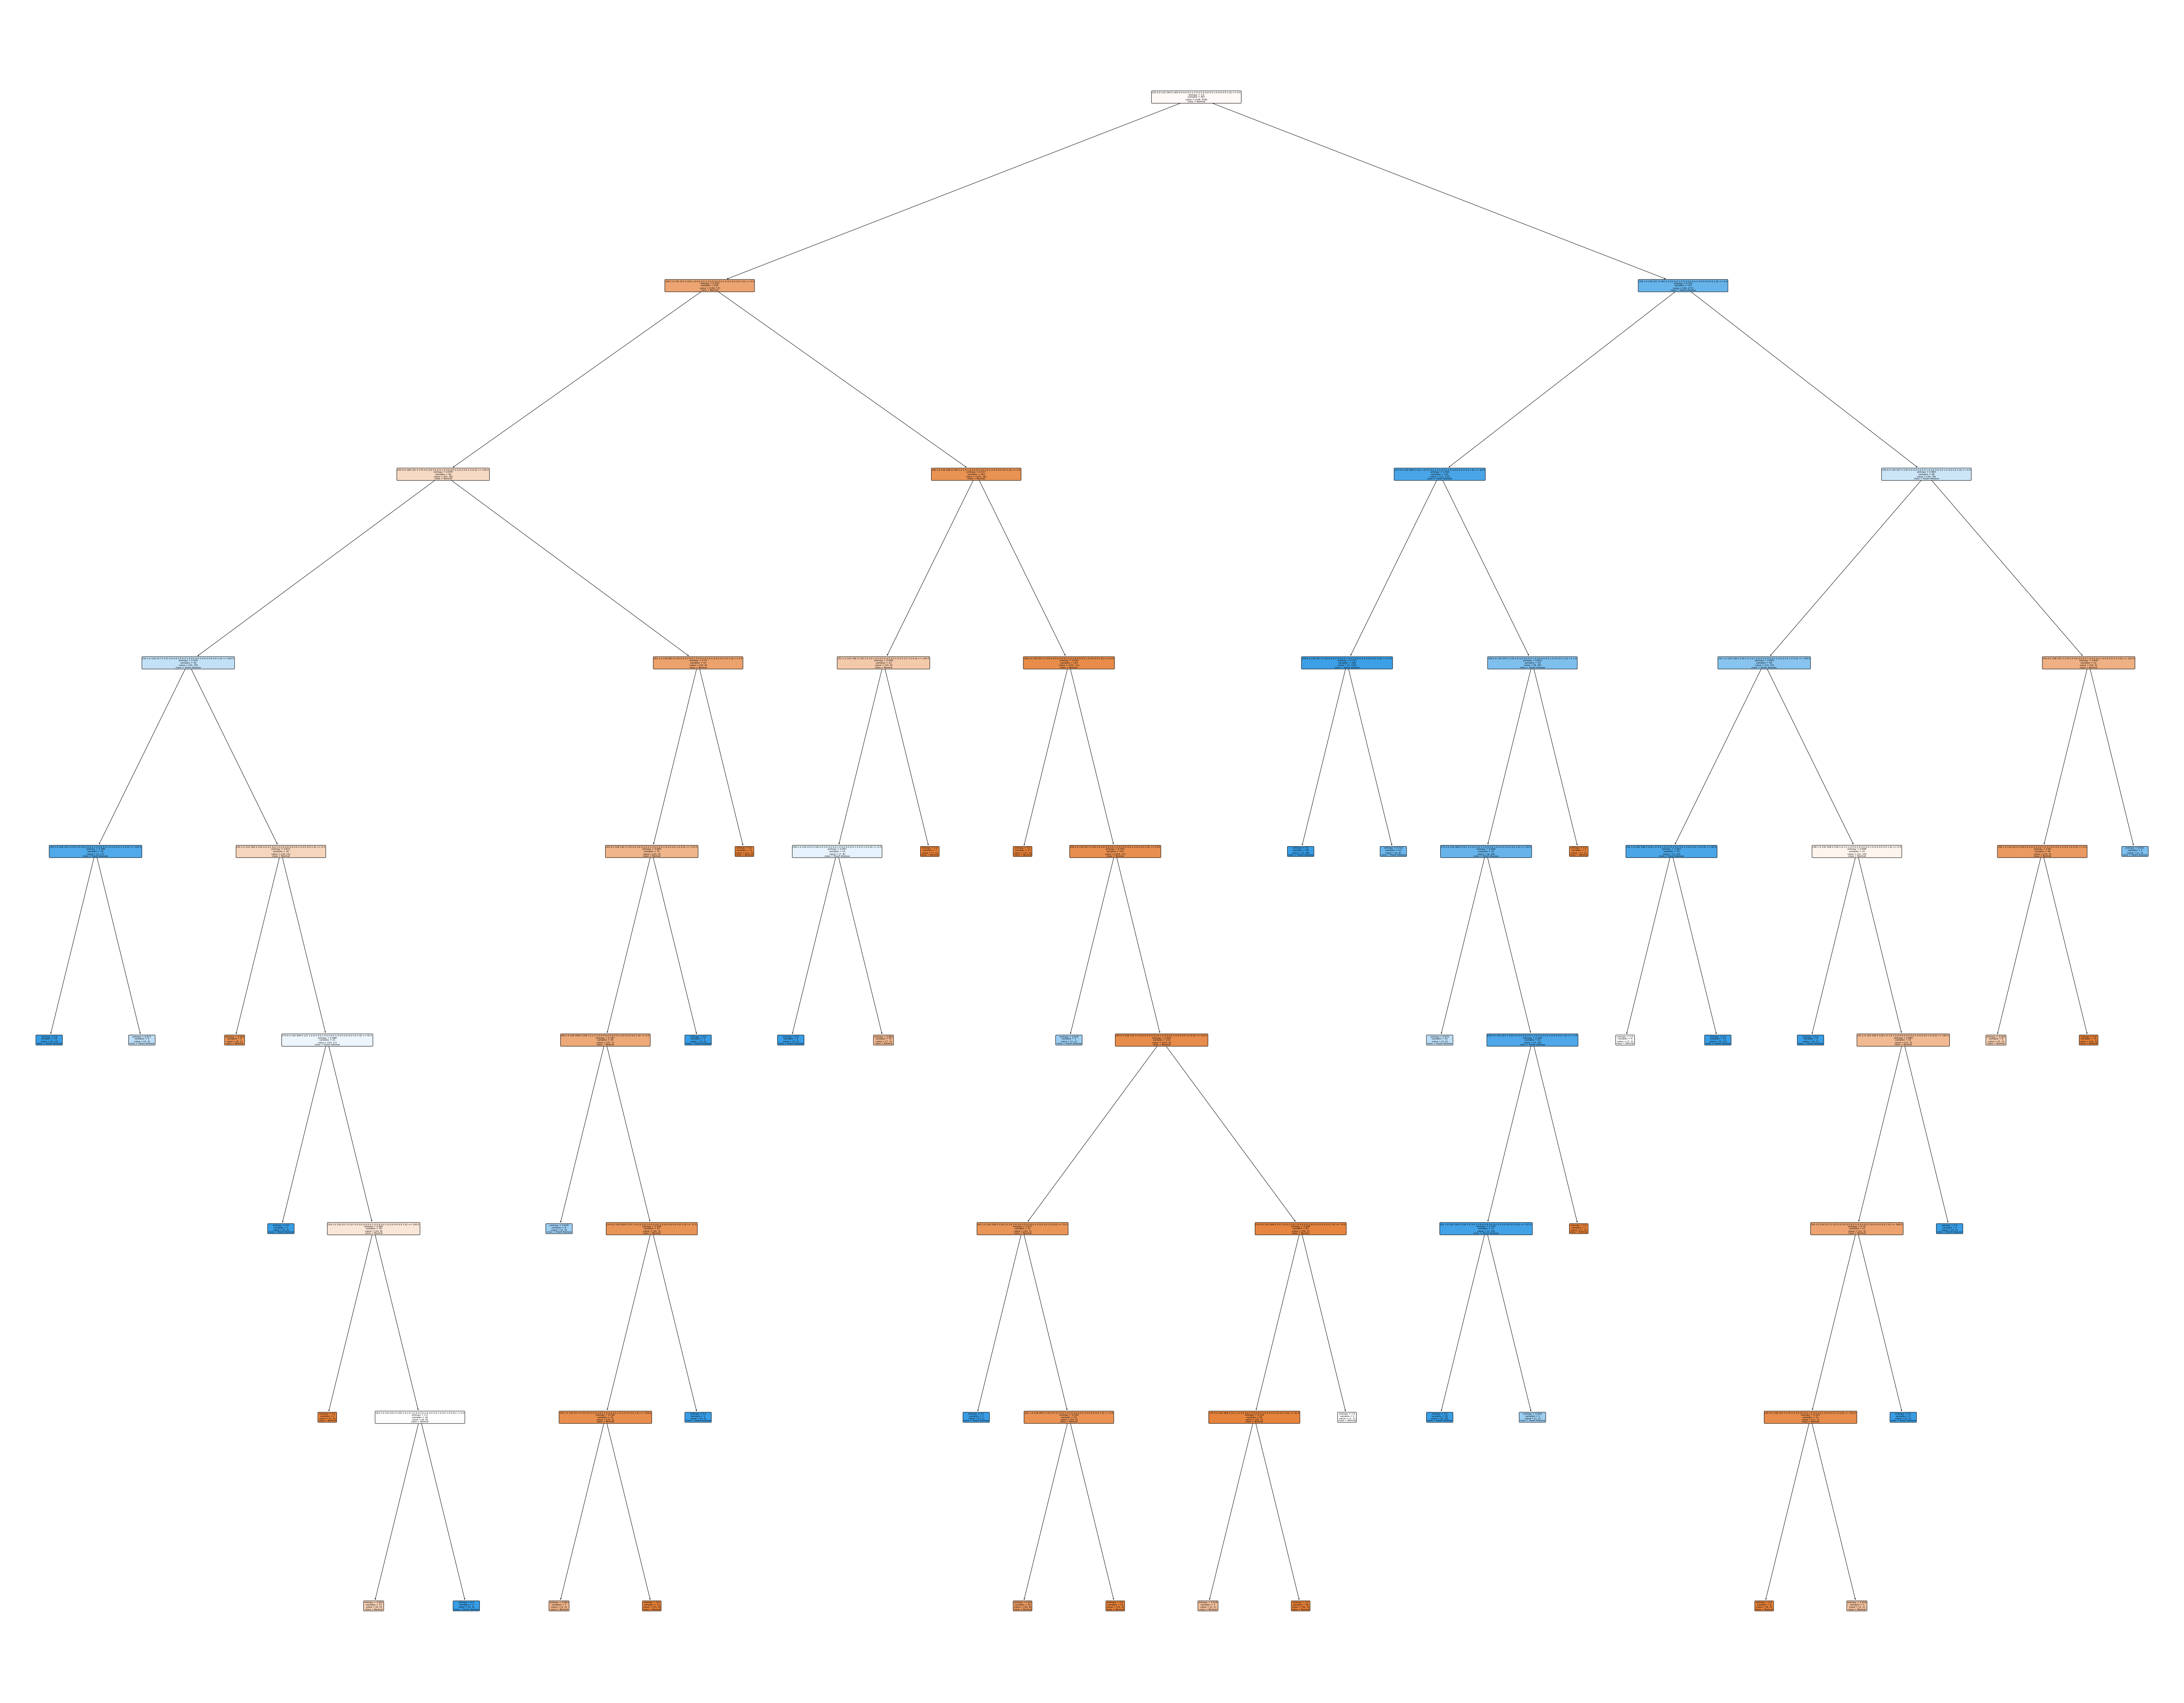

In [ ]:
# Show decision tree
plt.figure(figsize=[100,80]) # width, height in inches
plot_tree(model1, 
          feature_names=X_train,
          class_names=y_train,
          filled=True, rounded=True)
plt.show()

##### K vizinhos mais próximos.

Após a construção do melhor modelo dentro das árvores de decisão, partimos à procura do melhor modelo para os KNeighbors.

Tal como nas árvores, começamos por analisar a precisão com os parâmetros por omissão.

In [ ]:
# Training and Testing
X_train, X_test, y_train, y_test = train_test_split(data_h, target_h, test_size=0.5, random_state=2)

# Simple K-NN
clf = KNeighborsClassifier()
scores = cross_val_score(clf,
                         X=X_train,
                         y=y_train,
                         cv=5
                        )
print('CV accuracy:', *scores * 100, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores) * 100, np.std(scores) * 100))

CV accuracy:
	65.07936507936508
	58.06451612903226
	62.903225806451616
	61.29032258064516
	66.12903225806451
Average CV accuracy: 62.693 +/- 2.861


Ora, este valor de precisão é muito baixo e por isso decidimos normalizar os atributos do heart.csv utilizando o StandardScaler do scikit-learn.

In [ ]:
# Data Normalization
scaler = StandardScaler()
scaler.fit(data_h)
standardized_data_h = scaler.transform(data_h)

In [ ]:
# Print heart.csv standardized dataset
print(standardized_data_h[:5])

[[ 0.06442888 -1.8404684  -0.69490414 -0.25861249  1.89232195  0.04694202
  -0.7782481  -0.82460802 -0.98882646  1.97623678 -0.57796809 -0.23269189
  -0.54086146  0.84631758 -0.48591266 -0.26541804 -0.94836187  1.08200356]
 [ 0.27458172  0.54333994 -0.36162833 -1.47171803 -0.5284513   0.04694202
  -0.7782481  -0.82460802 -0.98882646  1.97623678 -0.57796809 -0.23269189
  -0.54086146 -1.18158954  2.05798302 -0.26541804 -0.94836187  1.08200356]
 [-0.46095322  0.54333994  0.41601523 -1.07366778 -0.5284513   1.31673319
  -0.7782481  -0.82460802 -0.98882646 -0.50601224  1.73019934 -0.23269189
  -0.54086146  0.84631758 -0.48591266 -0.26541804 -0.94836187  1.08200356]
 [ 0.79996382  0.54333994  0.4715612   0.91658351 -0.5284513  -0.94508233
   1.28493729  0.77991587  1.01129979 -0.50601224 -0.57796809 -0.23269189
  -0.54086146 -1.18158954  2.05798302 -0.26541804  1.05444981 -0.92421138]
 [-0.04064754  0.54333994 -0.69490414 -0.92202958 -0.5284513   0.04694202
  -0.7782481  -0.82460802 -0.98882

Agora que temos os dados normalizados, partimos para a criação de um novo modelo e para isso definimos um novo conjunto de treinos e testes, onde passaríamos os dados normalizados.

Para definirmos os valores do test_size e do random_state, a seguir à criação do modelo fizemos um ciclo for, com o test_size entre 0.05 e 1, onde somaria 0.05 em cada iteração e o random_state entre 1 e 30, onde somaria 1 a cada iteração e obtemos test_size=0.8 e random_state=9.

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(standardized_data_h, target_h, test_size=0.8, random_state=9)

Posto isto, criamos um modelo K-NN com os parâmetros por omissão e alterando cv para 15, para aumentarmos o número de folds obtemos os resultados a seguir representados.

In [ ]:
# Simple K-NN with standardized dataset
knn = KNeighborsClassifier()
knn.fit(X_train_s, y_train_s)
scores = cross_val_score(knn, X=X_train_s, y=y_train_s, cv=15)
print('CV accuracy:', *scores * 100, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' % (np.mean(scores) * 100, np.std(scores) * 100))

CV accuracy:
	88.88888888888889
	88.88888888888889
	100.0
	77.77777777777779
	100.0
	87.5
	87.5
	87.5
	87.5
	87.5
	87.5
	75.0
	100.0
	100.0
	100.0
Average CV accuracy: 90.370 +/- 7.799


Como podemos verificar a precisão deste modelo com os atributos normalizados é muito mais elevada, do que o modelo visto anteriormente. No entando, para verificar quais os melhores parâmetros a utilizar no modelo KNN, utilizamos o método GridSearchCV da biblioteca sklearn. Após uma busca intensiva e através do que foi lecionado nas aulas decidimos utilizar como parâmetros o n_neighbors entre 1 e 30, o leaf_size entre 1 e 50 e o p com valores possíveis 1 e 2, visto acharmos que se tratam dos parâmetros mais relevantes para este modelo.

In [ ]:
# SearchGridCV to tune Hyperparameters of KNN model

# Parameters
n_neighbors = list(range(1, 30))
leaf_size = list(range(1, 50))
p = [1, 2]
hyperparameters = dict(n_neighbors=n_neighbors, leaf_size=leaf_size, p=p)

# Search for the best values
clf = GridSearchCV(knn, hyperparameters, cv=15)
best_model = clf.fit(X_train_s, y_train_s)
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])

Best n_neighbors: 6
Best leaf_size: 1
Best p: 1


Para testarmos os parâmetros criamos outro modelo K-NN.

In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors=6, leaf_size=1, p=1)
modelKNN.fit(X_train_s, y_train_s)
scores = cross_val_score(modelKNN, X=X_train_s, y=y_train_s, cv=15)
print('CV accuracy:', *scores * 100, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' % (np.mean(scores) * 100, np.std(scores) * 100))

CV accuracy:
	88.88888888888889
	100.0
	100.0
	77.77777777777779
	100.0
	87.5
	100.0
	87.5
	100.0
	100.0
	87.5
	100.0
	87.5
	100.0
	100.0
Average CV accuracy: 94.444 +/- 7.208


Obtemos assim, uma média de precisão de aproximadamente 94.4%, o que já é um valor bastante mais aceitável, comparando com o valor obtido no primeiro modelo criado que foi de aproximadamente 62.7%.

##### Melhor Modelo ( Árvore de decisão vs K vizinhos mais próximos)

Dentro das árvores de decisão criamos 5 modelos, sendo o primeiro o que tem menos precisão e o último o com mais precisão. Sendo assim, a árvore de decisão final que obtemos foi a seguinte:

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=12)
model1 = dtc.fit(X_train, y_train)
print('MODEL ACCURACY: ', model1.score(X_test, y_test) * 100)

MODEL ACCURACY:  89.1025641025641


Dentro dos K vizinhos mais próximos ciramos 3 modelos e tal como nas árvores de decisão, o primeiro criado é o que tem menos precisão e o último o que tem mais. O melhor modelo que obtemos foi o seguinte:

In [ ]:
model2 = KNeighborsClassifier(n_neighbors=6, leaf_size=1, p=1)
model2.fit(X_train_s, y_train_s)
scores = cross_val_score(model2, X=X_train_s, y=y_train_s, cv=15)
print('CV accuracy:', *scores * 100, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' % (np.mean(scores) * 100, np.std(scores) * 100))

CV accuracy:
	88.88888888888889
	100.0
	100.0
	77.77777777777779
	100.0
	87.5
	100.0
	87.5
	100.0
	100.0
	87.5
	100.0
	87.5
	100.0
	100.0
Average CV accuracy: 94.444 +/- 7.208


Como podemos observar pelos 2 melhores modelos de cada tipo, o nosso melhor modelo geral é o dos K vizinhos mais próximos, onde obtemos uma precisão de 94.444% com uma margem de erro de 7.208%, ou seja o nosso modelo está correto em média 94.444% das vezes.

#### Etapa 4 - Gravar as previsões para o conjunto de teste fornecido

Como para utilizarmos o modelo K-NN foi aplicada uma normalização dos dados para heart.csv, temos que aplicar essa mesma normalização para os dados do test.csv.

In [ ]:
# Data Normalization
scaler = StandardScaler()
scaler.fit(data_t)
standardized_data_t = scaler.transform(data_t)

In [ ]:
# Print test.csv standardized dataset
print(standardized_data_t[:5])

[[ 1.04865835  0.52542708  1.34303064 -0.68685264  2.22325373 -0.95278996
   1.27785421  2.06195994  0.8819171  -0.50300303 -0.48795004 -0.21266436
  -0.50300303  0.74312772 -0.42640143  3.72251835 -0.94387981 -0.9258201 ]
 [ 0.24632175  0.52542708  0.90500575 -1.59520303 -0.44979122  0.49768228
  -0.78256188 -0.77584994  0.8819171  -0.50300303 -0.48795004 -0.21266436
  -0.50300303 -1.34566371  2.34520788 -0.26863534 -0.94387981  1.08012345]
 [ 1.62175593  0.52542708 -0.73758758 -0.34167949 -0.44979122 -0.30389449
   1.27785421  1.68358529  0.8819171  -0.50300303 -0.48795004 -0.21266436
   1.98805959 -1.34566371 -0.42640143 -0.26863534  1.05945693 -0.9258201 ]
 [-0.78525389  0.52542708  0.35747464  0.49400287 -0.44979122  1.07023711
   1.27785421 -0.77584994 -1.13389342  1.98805959 -0.48795004 -0.21266436
  -0.50300303  0.74312772 -0.42640143 -0.26863534 -0.94387981  1.08012345]
 [-1.35835147  0.52542708 -0.73758758  0.85734302 -0.44979122  1.26108872
  -0.78256188 -0.77584994 -1.13389

Por fim fizemos a previsão dos dados utilizando o método predict() e de seguida para confirmar que a previsão realmente aconteceu fizemos print destes dados.

In [ ]:
# Predict the heart disease
predict_test = best_model.predict(standardized_data_t)

# Print heart disease prediction
print(predict_test)

['Heart disease' 'Normal' 'Heart disease' 'Normal' 'Normal' 'Normal'
 'Normal' 'Heart disease' 'Normal' 'Normal' 'Heart disease'
 'Heart disease' 'Heart disease' 'Normal' 'Normal' 'Normal'
 'Heart disease' 'Heart disease' 'Normal' 'Normal' 'Heart disease'
 'Heart disease' 'Normal' 'Normal' 'Heart disease' 'Normal'
 'Heart disease' 'Heart disease' 'Normal' 'Normal' 'Normal'
 'Heart disease' 'Normal' 'Heart disease' 'Normal' 'Normal' 'Normal'
 'Heart disease' 'Heart disease' 'Normal' 'Heart disease' 'Normal'
 'Heart disease' 'Normal' 'Heart disease' 'Heart disease' 'Heart disease'
 'Heart disease' 'Normal' 'Normal' 'Normal' 'Heart disease' 'Normal'
 'Heart disease' 'Heart disease' 'Normal' 'Heart disease' 'Heart disease'
 'Normal' 'Normal' 'Heart disease' 'Normal' 'Normal' 'Normal'
 'Heart disease' 'Heart disease' 'Normal' 'Normal' 'Heart disease'
 'Normal' 'Heart disease' 'Normal' 'Heart disease' 'Normal'
 'Heart disease' 'Normal' 'Normal' 'Heart disease' 'Normal' 'Normal'
 'Heart disea

Como podemos observar, a previsão foi efetuado e por isso estamos aptos a guarda-la num ficheiro .csv através da utilização da função save_data() da biblioteca utilsAA.

In [ ]:
# Save the data into a .csv file named 'IIA2021-proj3-34.csv'
save_data('IIA2021-proj3-34.csv', predict_test)

#### Extra

Para além das árvores de decisão e do k vizinhos mais próximos, decidimos treinar redes neuronais para classificar os pacientes de forma a escolher o melhor modelo entre os 3.

Começamos por definir um novo modelo de conjunto de treinos e testes.

In [ ]:
#Define train and tests
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(data_h, target_h, random_state=2)

De seguida, utilizamos a classe Perceptron para produzir perceptrões lineares.

In [ ]:
from sklearn.linear_model import Perceptron

per = Perceptron(random_state=1)
per.fit(X_train_n, y_train_n)
print("TEST ACCURACY:",  per.score(X_test_n, y_test_n)* 100)
print("TRAINING ACCURACY:",  per.score(X_train_n, y_train_n)* 100)

TEST ACCURACY: 53.84615384615385
TRAINING ACCURACY: 51.82012847965739


Mais tarde, utilizamos a classe MLPClassifier para produzir perceptrões multi-camada, começando com um máximo de iterações de 1000.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, max_iter = 1000) 
mlp.fit(X_train_n, y_train_n)
print("TEST ACCURACY:",  mlp.score(X_test_n, y_test_n)* 100)
print("TRAINING ACCURACY:",  mlp.score(X_train_n, y_train_n)* 100)

TEST ACCURACY: 81.41025641025641
TRAINING ACCURACY: 86.7237687366167


Como se pode observar acima, os valores de exatidão aumetam utilizando a classe MLPClassifier em relação à classe Perception.

Vamos agora observar os resultados obtidos alterando e adicionando alguns parâmetros a esta classe:

Começando pela função de ativação logistic:

In [ ]:
mlp_logistic = MLPClassifier(random_state=1, max_iter = 1000, activation = 'logistic') 
mlp_logistic.fit(X_train_n, y_train_n)
print("TEST ACCURACY:",  mlp_logistic.score(X_test_n, y_test_n)* 100)
print("TRAINING ACCURACY:",  mlp_logistic.score(X_train_n, y_train_n)* 100)

TEST ACCURACY: 79.48717948717949
TRAINING ACCURACY: 85.4389721627409


Agora com a  função de ativação tanh:

In [ ]:
mlp_tanh = MLPClassifier(random_state=1, max_iter = 1000, activation = 'tanh') 
mlp_tanh.fit(X_train_n, y_train_n)
print("TEST ACCURACY:",  mlp_tanh.score(X_test_n, y_test_n)* 100)
print("TRAINING ACCURACY:",  mlp_tanh.score(X_train_n, y_train_n)* 100)

TEST ACCURACY: 81.41025641025641
TRAINING ACCURACY: 87.36616702355461


Vamos agora observar os resultados obtidos utilizando o parâmetro hidden_layer_sizes, que indica o número de nós em cada uma das camadas escondidas.

Começando com 50 nós:

In [ ]:
mlp_fiftynodes = MLPClassifier(random_state=1, max_iter = 1000, hidden_layer_sizes = (50,)) 
mlp_fiftynodes.fit(X_train_n, y_train_n)
print("TEST ACCURACY:",  mlp_fiftynodes.score(X_test_n, y_test_n)* 100)
print("TRAINING ACCURACY:",  mlp_fiftynodes.score(X_train_n, y_train_n)* 100)

TEST ACCURACY: 81.41025641025641
TRAINING ACCURACY: 85.01070663811564


Agora com 3 camadas de 10 nós cada:

In [ ]:
mlp_10each = MLPClassifier(random_state=1, max_iter = 1000, hidden_layer_sizes = (10,10,10)) 
mlp_10each.fit(X_train_n, y_train_n)
print("TEST ACCURACY:",  mlp_10each.score(X_test_n, y_test_n)* 100)
print("TRAINING ACCURACY:",  mlp_10each.score(X_train_n, y_train_n)* 100)

TEST ACCURACY: 78.2051282051282
TRAINING ACCURACY: 84.58244111349036


Definimos um modelo de conjunto de testes e treinos com random_state = 1:

In [ ]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(data_h, target_h, random_state=1)

Vamos treinar um MLP com 'relu' e 3 camadas de 10 nós cada e obter as médias de exatidão:

In [ ]:
mlp_10each = MLPClassifier(random_state=1, max_iter = 1000, hidden_layer_sizes = (10,10,10)) 
mlp_10each.fit(X_train_n, y_train_n)
print("TEST ACCURACY:",  mlp_10each.score(X_test_n, y_test_n)* 100)
print("TRAINING ACCURACY:",  mlp_10each.score(X_train_n, y_train_n)* 100)
print()

accuracy = []
for i in range(25):
    X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(data_h, target_h)
    mlp_10each.fit(X_train_n, y_train_n)
    testaccuracy = mlp_10each.score(X_test_n, y_test_n)
    accuracy.append(testaccuracy)
    print("ACCURACY FOR TEST", i, ":",  testaccuracy * 100)
print("AVERAGE ACCURACY:", sum(accuracy)/len(accuracy) * 100)

TEST ACCURACY: 83.97435897435898
TRAINING ACCURACY: 83.94004282655246

ACCURACY FOR TEST 0 : 80.76923076923077
ACCURACY FOR TEST 1 : 83.97435897435898
ACCURACY FOR TEST 2 : 86.53846153846155
ACCURACY FOR TEST 3 : 82.05128205128204
ACCURACY FOR TEST 4 : 73.71794871794873
ACCURACY FOR TEST 5 : 77.56410256410257
ACCURACY FOR TEST 6 : 80.12820512820514
ACCURACY FOR TEST 7 : 82.6923076923077
ACCURACY FOR TEST 8 : 80.12820512820514
ACCURACY FOR TEST 9 : 78.2051282051282
ACCURACY FOR TEST 10 : 83.97435897435898
ACCURACY FOR TEST 11 : 80.12820512820514
ACCURACY FOR TEST 12 : 81.41025641025641
ACCURACY FOR TEST 13 : 82.05128205128204
ACCURACY FOR TEST 14 : 83.97435897435898
ACCURACY FOR TEST 15 : 83.33333333333334
ACCURACY FOR TEST 16 : 83.97435897435898
ACCURACY FOR TEST 17 : 83.97435897435898
ACCURACY FOR TEST 18 : 83.33333333333334
ACCURACY FOR TEST 19 : 80.12820512820514
ACCURACY FOR TEST 20 : 82.05128205128204
ACCURACY FOR TEST 21 : 82.05128205128204
ACCURACY FOR TEST 22 : 80.7692307692307

Por último, normalizamos os dados aplicando o StandardScaler.

Adaptamos o escalonador aos dados de treino e calculamos o valor médio e a variância para cada feature:

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train_n)
print("AVERAGE VALUE FOR EACH FEATURE:")
print(sc.mean_)
print()
print("VARIANCE FOR EACH FEATURE:")
print(sc.var_)
print()

AVERAGE VALUE FOR EACH FEATURE:
[5.33083512e+01 7.70877944e-01 1.32678801e+02 2.44764454e+02
 2.29122056e-01 1.39528908e+02 3.79014989e-01 8.70235546e-01
 4.94646681e-01 1.94860814e-01 2.52676660e-01 5.78158458e-02
 2.24839400e-01 5.88865096e-01 1.86295503e-01 6.63811563e-02
 4.58244111e-01 4.75374732e-01]

VARIANCE FOR EACH FEATURE:
[9.08085598e+01 1.76625139e-01 3.34834733e+02 2.51786315e+03
 1.76625139e-01 6.42000770e+02 2.35362627e-01 1.08744384e+00
 2.49971342e-01 1.56890077e-01 1.88831165e-01 5.44731738e-02
 1.74286644e-01 2.42102995e-01 1.51589489e-01 6.19746984e-02
 2.48256446e-01 2.49393596e-01]



E por fim visualizamos as exatidões dos conjuntos com os dados escalonados:

In [ ]:
X_train_sc = sc.transform(X_train_n)
X_test_sc = sc.transform(X_test_n)

In [ ]:
mlp_sc = MLPClassifier(random_state=1)
mlp_sc.fit(X_train_sc, y_train_n)
print("TEST ACCURACY WITH 200 ITERATIONS:",  mlp_sc.score(X_test_sc, y_test_n)* 100)
print("TRAINING ACCURACY WITH 200 ITERATIONS:",  mlp_sc.score(X_train_sc, y_train_n)* 100)
print()

TEST ACCURACY WITH 200 ITERATIONS: 81.41025641025641
TRAINING ACCURACY WITH 200 ITERATIONS: 93.57601713062098



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Aumentando o máximo de iterações ao treino anterior:

In [ ]:
mlp_sc2 = MLPClassifier(random_state=1, max_iter = 1000)
mlp_sc2.fit(X_train_sc, y_train_n)
print("TEST ACCURACY WITH 1000 ITERATIONS:",  mlp_sc2.score(X_test_sc, y_test_n)* 100)
print("TRAINING ACCURACY WITH 1000 ITERATIONS:",  mlp_sc2.score(X_train_sc, y_train_n)* 100)

TEST ACCURACY WITH 1000 ITERATIONS: 80.76923076923077
TRAINING ACCURACY WITH 1000 ITERATIONS: 100.0


Tendo em conta os resultados da decisão de melhor modelo efetuada na etapa 3, conclui-se que as redes neuronais não correspondem ao melhor modelo visto que os valores máximos obtidos no treino não ultrapassam os valores para o modelo dos K vizinhos mais próximos.